In [28]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import warnings
import seaborn as sns

# Standardizing features using Log function 

In [2]:
df = pd.read_csv('C:/Users/19874/OneDrive/data.csv')
df = df.fillna(0)
df['PEG'] = df['PEG'].apply(lambda x: np.log(x) if x > 0 else (-np.log(-x) if x < 0 else 0))
df['Market Cap'] = df['Market Cap'].apply(lambda x: np.log(x) if x > 0 else(-np.log(-x) if x < 0 else 0))

In [3]:
kmeans = KMeans(n_clusters = 9, random_state = 42)
kmeans.fit(df[['PEG','Market Cap']])


KMeans(n_clusters=9, random_state=42)

In [4]:
df['Cluster'] = kmeans.labels_
centers = kmeans.cluster_centers_
print("Clustrer Centers", centers)

Clustrer Centers [[ -0.30942847  20.19124084]
 [ -3.58456413  21.68249044]
 [  2.28337956  19.55953819]
 [  3.75619209  21.26302302]
 [-21.01951892  20.5855837 ]
 [ -3.4562465   19.60651215]
 [  5.85915883  20.9156349 ]
 [ 20.16138     19.65901243]
 [ -5.69635361  21.06274025]]


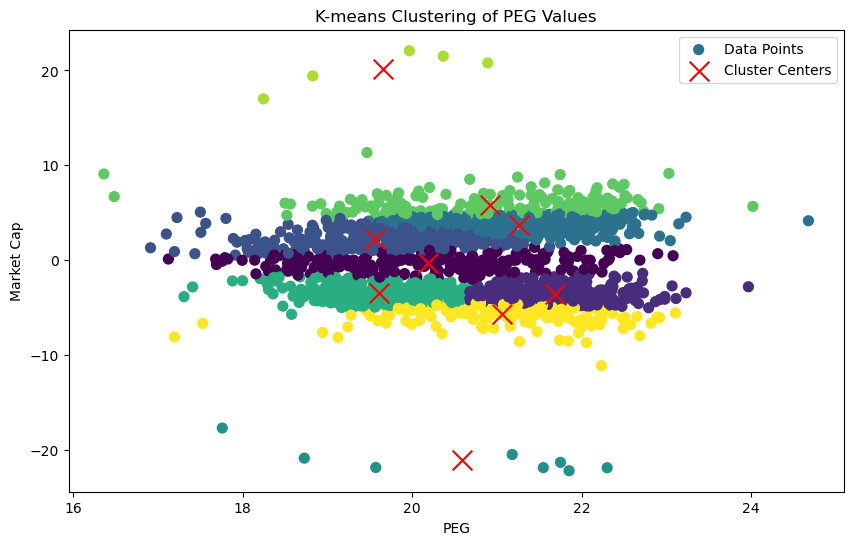

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Market Cap'], df['PEG'], c=df['Cluster'], cmap='viridis', marker='o', s=50, label='Data Points')

plt.scatter(centers[:, 1], centers[:, 0], c='red', marker='x', s=200, label='Cluster Centers')

plt.xlabel('PEG')
plt.ylabel('Market Cap')
plt.title('K-means Clustering of PEG Values')
plt.legend()
plt.show()

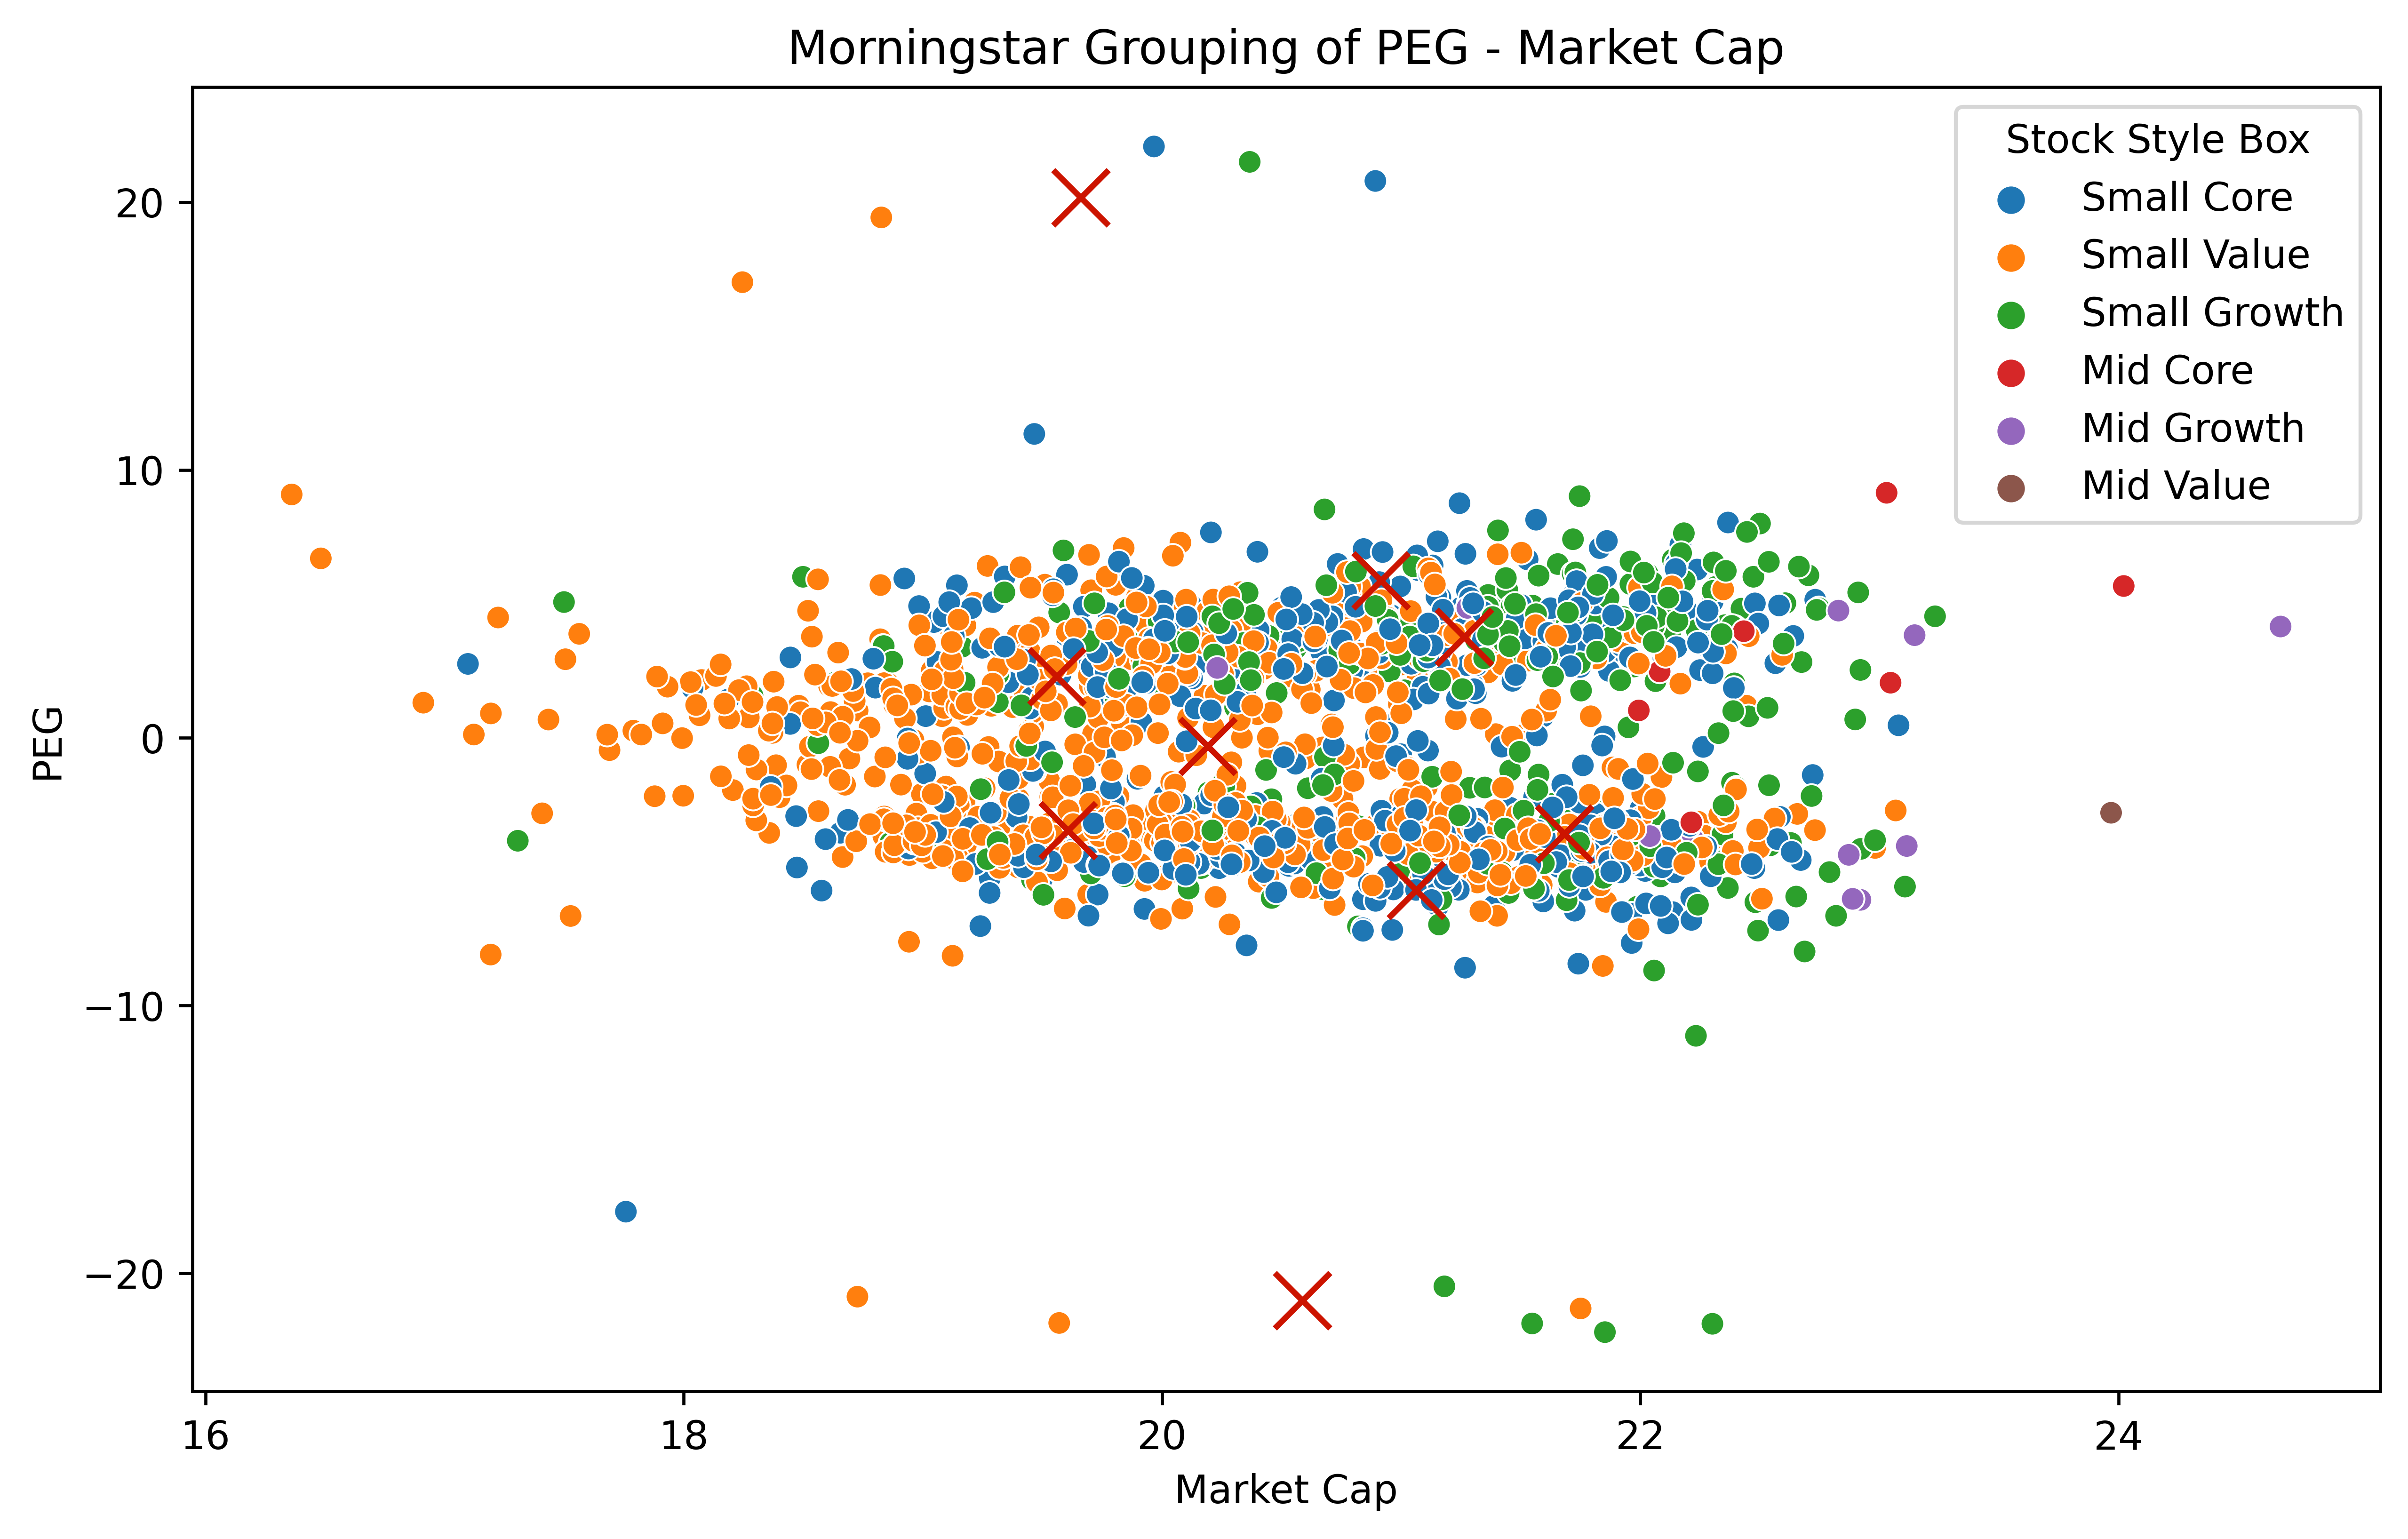

In [29]:
plt.figure(dpi=600, figsize=(10, 6))
data = pd.read_csv('C:/Users/19874/OneDrive/Final_data.csv')
sns.scatterplot(data=data, x='Market Cap', y='PEG', hue='Stock Style Box')
plt.scatter(centers[:, 1], centers[:, 0], c='#CC1400', marker='x', s=200, label='Cluster Centers')
plt.xlabel('Market Cap')
plt.ylabel('PEG')
plt.title('Morningstar Grouping of PEG - Market Cap')
plt.savefig('Morningstar Grouping of PEG - Market Cap.png')
plt.show()